In [1]:
import json
import pandas as pd

In [ ]:
with open("longmemeval-cleaned/Long Meme Val Cleaned.json", "r", encoding="utf-8") as f:
    longmemeval_m = json.load(f)

with open("longmemeval-cleaned/Long Memeval Cleaned.json", "r", encoding="utf-8") as f:
    longmemeval_s = json.load(f)

with open("longmemeval-cleaned/Long Meme Val Oracle.json", "r", encoding="utf-8") as f:
    longmemeval_o = json.load(f)

In [47]:
longmemeval_s_df = pd.DataFrame(longmemeval_s).sort_values(by="question_id").reset_index(drop=True)
longmemeval_m_df = pd.DataFrame(longmemeval_m).sort_values(by="question_id").reset_index(drop=True)
longmemeval_o_df = pd.DataFrame(longmemeval_o).sort_values(by="question_id").reset_index(drop=True)

In [67]:
columns_to_compare = [
    "question_id",
    "question_type",
    "question",
    "answer",
    # "question_date",
    # "answer_session_ids",
    # "haystack_dates",
    # "haystack_session_ids",
    # "haystack_sessions",
]

print("Comparing oracle and short memeval")
result_oracle_short = (longmemeval_o_df[columns_to_compare] == longmemeval_s_df[columns_to_compare]).all().all()
print(f"Match: {result_oracle_short}")

print("Comparing short and long memeval")
result_short_long = (longmemeval_s_df[columns_to_compare] == longmemeval_m_df[columns_to_compare]).all().all()
print(f"Match: {result_short_long}")


Comparing oracle and short memeval
Match: True
Comparing short and long memeval
Match: True


In [52]:
longmemeval_o_df['question_date'] == longmemeval_s_df['question_date']

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: question_date, Length: 500, dtype: bool

In [57]:
print(longmemeval_o_df["question"][0])
print(longmemeval_s_df["question"][0])
print(longmemeval_m_df["question"][0])
print(longmemeval_o_df["question_date"][0])
print(longmemeval_s_df["question_date"][0])
print(longmemeval_m_df["question_date"][0])

How long did I wait for the decision on my asylum application?
How long did I wait for the decision on my asylum application?
How long did I wait for the decision on my asylum application?
2023/05/28 (Sun) 19:47
2023/05/30 (Tue) 10:18
2023/05/30 (Tue) 23:53


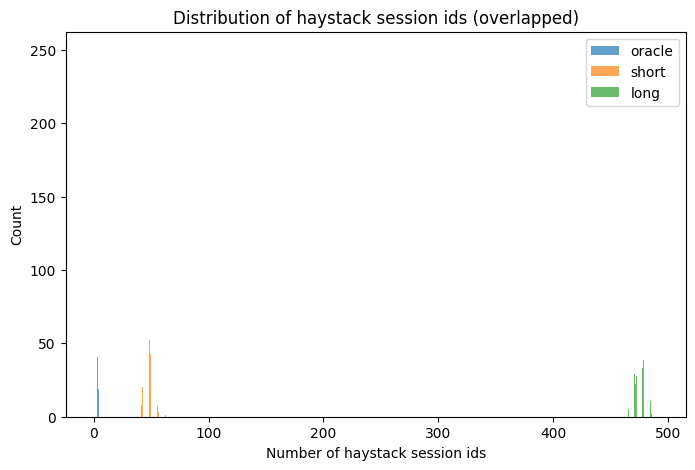

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(
    [
        longmemeval_o_df["haystack_session_ids"].apply(len),
        longmemeval_s_df["haystack_session_ids"].apply(len),
        longmemeval_m_df["haystack_session_ids"].apply(len),
    ],
    bins=range(
        0,
        max(
            longmemeval_o_df["haystack_session_ids"].apply(len).max(),
            longmemeval_s_df["haystack_session_ids"].apply(len).max(),
            longmemeval_m_df["haystack_session_ids"].apply(len).max(),
        )
        + 2,
    ),
    label=["oracle", "short", "long"],
    alpha=0.7,
)
plt.xlabel("Number of haystack session ids")
plt.ylabel("Count")
plt.title("Distribution of haystack session ids (overlapped)")
plt.legend()
plt.show()